# Install and Import Dependencies

In [1]:
!pip install opencv-python pandas scikit-learn

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiomentations 0.38.0 requires numpy<2,>=1.21.0, but you have numpy 2.2.6 which is incompatible.
audiomentations 0.38.0 requires scipy<1.13,>=1.4, but you have scipy 1.16.1 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.
numpy-minmax 0.3.1 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
numpy-rms 0.4.2 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.


INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.8/39.0 MB 5.6 MB/s eta 0:00:07
   ---- ----------------------------------- 4.7/39.0 MB 8.9 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/39.0 MB 11.7 MB/s eta 0:00:03
   ------------ --------------------------- 12.6/39.0 MB 13.4 MB/s eta 0:00:02
   ----------------- ---------------------- 16.8/39.0 MB 14.5 MB/s eta 0:00:02
   --------------------- ------------------ 20.7/39.0 MB 15.2 MB/s eta 0:00:02
   ------------------------- -------------- 24.9/39.0 MB 15.8 MB/s eta 0:00:01
   ----------------------------- ---------- 28.6/39.0 MB 16.2 MB/s eta 0:00:01
   --------------------------------- ------ 33.0/39.0 MB 16.5 MB/s eta 0:00:01
   -

In [2]:
!pip install mediapipe --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.3 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.



INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/51.0 MB 5.2 MB/s eta 0:00:10
   -- ------------------------------------- 3.4/51.0 MB 8.0 MB/s eta 0:00:06
   ----- ---------------------------------- 7.3/51.0 MB 11.6 MB/s eta 0:00:04
   -------- ------------------------------- 11.3/51.0 MB 13.5 MB/s eta 0:00:03
   ------------ --------------------------- 15.5/51.0 MB 14.7 MB/s eta 0:00:03
   -------------- ------------------------- 18.9/51.0 MB 14.9 MB/s eta 0:00:03
   ----------------- ---------------------- 22.8/51.0 MB 15.5 MB/s eta 0:00:02
   --------------------- ------------------ 27.0/51.0 MB 16.0 MB/s eta 0:00:02
   ------------------------ --------------- 31.2/51.0 MB 16.5 MB/s eta 0:0

In [3]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [4]:
mp_drawing = mp.solutions.drawing_utils # functions for drawing landmarks and connections on images
mp_holistic = mp.solutions.holistic # Mediapipe module provides a holistic solution for hand tracking

# Pre-processing

In [2]:
import csv 
import os # help with folder structure
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv('Hands.csv')
df1.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,Hi,0.399669,0.771888,5.855777e-07,0.0,0.471704,0.818704,-0.007639,0.0,0.539933,...,-0.130502,0.0,0.473027,0.908321,-0.136990,0.0,0.488182,0.943748,-0.141626,0.0
1,Hi,0.326662,0.685520,1.823212e-07,0.0,0.371040,0.649936,-0.015554,0.0,0.402727,...,-0.058374,0.0,0.233220,0.464190,-0.064456,0.0,0.219939,0.432127,-0.068655,0.0
2,Hi,0.335081,0.675708,3.166533e-07,0.0,0.367446,0.632163,-0.026991,0.0,0.380033,...,-0.052400,0.0,0.202306,0.479625,-0.062754,0.0,0.185163,0.450007,-0.068790,0.0
3,Hi,0.403145,0.714534,1.285911e-07,0.0,0.438785,0.666408,-0.013298,0.0,0.458012,...,-0.041766,0.0,0.299293,0.512605,-0.046027,0.0,0.288020,0.483609,-0.048730,0.0
4,Hi,0.411416,0.727692,1.709529e-07,0.0,0.458016,0.702287,-0.015058,0.0,0.493406,...,-0.032773,0.0,0.368805,0.494396,-0.035537,0.0,0.367103,0.463019,-0.037865,0.0


In [4]:
df2 = pd.read_csv('HandAS.csv')
df2.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,Hi,0.167708,1.000282,5.030000e-07,0,0.226985,0.934877,-0.021732,0,0.257937,...,-0.062023,0,0.113389,0.663758,-0.069845,0,0.123487,0.640822,-0.073467,0
1,Hi,0.238372,0.878532,4.150000e-07,0,0.309971,0.836525,-0.029182,0,0.355149,...,-0.028145,0,0.211632,0.516724,-0.032366,0,0.220646,0.470336,-0.034431,0
2,Hi,0.247192,0.872528,4.950000e-07,0,0.319560,0.824544,-0.032190,0,0.365086,...,-0.019902,0,0.223372,0.518904,-0.023741,0,0.234821,0.474969,-0.025296,0
3,Hi,0.246261,0.870329,4.940000e-07,0,0.318779,0.827258,-0.032881,0,0.363492,...,-0.020438,0,0.224429,0.514736,-0.025168,0,0.234877,0.469610,-0.027274,0
4,Hi,0.249132,0.872762,5.570000e-07,0,0.322815,0.827013,-0.037434,0,0.367568,...,-0.016125,0,0.227280,0.518800,-0.020708,0,0.237697,0.473400,-0.022850,0


In [5]:
df2 = pd.read_csv('HandAS.csv')
df2.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,Hi,0.167708,1.000282,5.030000e-07,0,0.226985,0.934877,-0.021732,0,0.257937,...,-0.062023,0,0.113389,0.663758,-0.069845,0,0.123487,0.640822,-0.073467,0
1,Hi,0.238372,0.878532,4.150000e-07,0,0.309971,0.836525,-0.029182,0,0.355149,...,-0.028145,0,0.211632,0.516724,-0.032366,0,0.220646,0.470336,-0.034431,0
2,Hi,0.247192,0.872528,4.950000e-07,0,0.319560,0.824544,-0.032190,0,0.365086,...,-0.019902,0,0.223372,0.518904,-0.023741,0,0.234821,0.474969,-0.025296,0
3,Hi,0.246261,0.870329,4.940000e-07,0,0.318779,0.827258,-0.032881,0,0.363492,...,-0.020438,0,0.224429,0.514736,-0.025168,0,0.234877,0.469610,-0.027274,0
4,Hi,0.249132,0.872762,5.570000e-07,0,0.322815,0.827013,-0.037434,0,0.367568,...,-0.016125,0,0.227280,0.518800,-0.020708,0,0.237697,0.473400,-0.022850,0


In [6]:
frames = [df1, df2]
result = pd.concat(frames)
df=result

In [7]:
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,Hi,0.399669,0.771888,5.855777e-07,0.0,0.471704,0.818704,-0.007639,0.0,0.539933,...,-0.130502,0.0,0.473027,0.908321,-0.136990,0.0,0.488182,0.943748,-0.141626,0.0
1,Hi,0.326662,0.685520,1.823212e-07,0.0,0.371040,0.649936,-0.015554,0.0,0.402727,...,-0.058374,0.0,0.233220,0.464190,-0.064456,0.0,0.219939,0.432127,-0.068655,0.0
2,Hi,0.335081,0.675708,3.166533e-07,0.0,0.367446,0.632163,-0.026991,0.0,0.380033,...,-0.052400,0.0,0.202306,0.479625,-0.062754,0.0,0.185163,0.450007,-0.068790,0.0
3,Hi,0.403145,0.714534,1.285911e-07,0.0,0.438785,0.666408,-0.013298,0.0,0.458012,...,-0.041766,0.0,0.299293,0.512605,-0.046027,0.0,0.288020,0.483609,-0.048730,0.0
4,Hi,0.411416,0.727692,1.709529e-07,0.0,0.458016,0.702287,-0.015058,0.0,0.493406,...,-0.032773,0.0,0.368805,0.494396,-0.035537,0.0,0.367103,0.463019,-0.037865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,Quote,0.481032,0.819573,5.190000e-07,0.0,0.525861,0.786632,-0.026501,0.0,0.547868,...,-0.061278,0.0,0.477424,0.680981,-0.058529,0.0,0.487216,0.710594,-0.047923,0.0
9510,Quote,0.478411,0.820483,5.370000e-07,0.0,0.523753,0.788292,-0.026392,0.0,0.547696,...,-0.062423,0.0,0.474026,0.679692,-0.059370,0.0,0.481986,0.710854,-0.048883,0.0
9511,Quote,0.513343,0.855287,3.180000e-07,0.0,0.562117,0.810972,-0.011562,0.0,0.594828,...,-0.047282,0.0,0.511315,0.694420,-0.046909,0.0,0.526355,0.727803,-0.040813,0.0
9512,Quote,0.537689,0.884458,4.240000e-07,0.0,0.584678,0.854220,-0.022361,0.0,0.628115,...,-0.064608,0.0,0.530592,0.727569,-0.065219,0.0,0.549486,0.767861,-0.058593,0.0


In [8]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,Hi,0.399669,0.771888,5.855777e-07,0.0,0.471704,0.818704,-0.007639,0.0,0.539933,...,-0.130502,0.0,0.473027,0.908321,-0.136990,0.0,0.488182,0.943748,-0.141626,0.0
1,Hi,0.326662,0.685520,1.823212e-07,0.0,0.371040,0.649936,-0.015554,0.0,0.402727,...,-0.058374,0.0,0.233220,0.464190,-0.064456,0.0,0.219939,0.432127,-0.068655,0.0
2,Hi,0.335081,0.675708,3.166533e-07,0.0,0.367446,0.632163,-0.026991,0.0,0.380033,...,-0.052400,0.0,0.202306,0.479625,-0.062754,0.0,0.185163,0.450007,-0.068790,0.0
3,Hi,0.403145,0.714534,1.285911e-07,0.0,0.438785,0.666408,-0.013298,0.0,0.458012,...,-0.041766,0.0,0.299293,0.512605,-0.046027,0.0,0.288020,0.483609,-0.048730,0.0
4,Hi,0.411416,0.727692,1.709529e-07,0.0,0.458016,0.702287,-0.015058,0.0,0.493406,...,-0.032773,0.0,0.368805,0.494396,-0.035537,0.0,0.367103,0.463019,-0.037865,0.0


In [9]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
9509,Quote,0.481032,0.819573,5.190000e-07,0.0,0.525861,0.786632,-0.026501,0.0,0.547868,...,-0.061278,0.0,0.477424,0.680981,-0.058529,0.0,0.487216,0.710594,-0.047923,0.0
9510,Quote,0.478411,0.820483,5.370000e-07,0.0,0.523753,0.788292,-0.026392,0.0,0.547696,...,-0.062423,0.0,0.474026,0.679692,-0.059370,0.0,0.481986,0.710854,-0.048883,0.0
9511,Quote,0.513343,0.855287,3.180000e-07,0.0,0.562117,0.810972,-0.011562,0.0,0.594828,...,-0.047282,0.0,0.511315,0.694420,-0.046909,0.0,0.526355,0.727803,-0.040813,0.0
9512,Quote,0.537689,0.884458,4.240000e-07,0.0,0.584678,0.854220,-0.022361,0.0,0.628115,...,-0.064608,0.0,0.530592,0.727569,-0.065219,0.0,0.549486,0.767861,-0.058593,0.0
9513,Quote,0.536463,0.886120,4.840000e-07,0.0,0.586021,0.855130,-0.022290,0.0,0.631903,...,-0.066683,0.0,0.527701,0.724459,-0.066794,0.0,0.548499,0.763598,-0.059379,0.0


In [10]:
df['class'].value_counts()

class
Love you    2791
Hi          2771
Good job    2718
Quote       2683
Question    2550
Name: count, dtype: int64

In [11]:
df[df['class']=='Good job']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
744,Good job,0.349470,0.896454,5.339176e-07,0.0,0.418503,0.845631,-0.012494,0.0,0.487629,...,-0.089857,0.0,0.504795,0.902814,-0.093605,0.0,0.540172,0.926662,-0.093321,0.0
745,Good job,0.320724,0.792820,-2.593162e-07,0.0,0.376845,0.693436,-0.016154,0.0,0.391946,...,-0.060819,0.0,0.339609,0.710154,-0.061941,0.0,0.362698,0.719513,-0.059082,0.0
746,Good job,0.297647,0.723651,1.335074e-08,0.0,0.354523,0.631119,-0.025071,0.0,0.365047,...,-0.070935,0.0,0.322352,0.669459,-0.076294,0.0,0.342663,0.675024,-0.077903,0.0
747,Good job,0.333542,0.712067,-2.833505e-07,0.0,0.376204,0.627749,-0.019240,0.0,0.379196,...,-0.057180,0.0,0.335750,0.672259,-0.056811,0.0,0.343382,0.676748,-0.053509,0.0
748,Good job,0.334669,0.700607,-3.123980e-07,0.0,0.376415,0.623286,-0.018963,0.0,0.381507,...,-0.056518,0.0,0.339361,0.660360,-0.054368,0.0,0.343999,0.668610,-0.048764,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,Good job,0.315078,0.825451,7.700000e-08,0.0,0.400437,0.735021,-0.012528,0.0,0.456809,...,-0.099680,0.0,0.470411,0.823607,-0.094348,0.0,0.459095,0.826755,-0.088646,0.0
3928,Good job,0.318403,0.860345,5.670000e-09,0.0,0.411357,0.779299,-0.019516,0.0,0.471554,...,-0.094774,0.0,0.458995,0.863189,-0.093129,0.0,0.462774,0.880756,-0.088045,0.0
3929,Good job,0.313251,0.863776,-1.710000e-08,0.0,0.409678,0.780233,-0.016535,0.0,0.472119,...,-0.089705,0.0,0.459627,0.862375,-0.088426,0.0,0.463297,0.880516,-0.083878,0.0
3930,Good job,0.313264,0.916777,-1.810000e-07,0.0,0.416066,0.837021,-0.014335,0.0,0.484411,...,-0.106201,0.0,0.453162,0.924528,-0.105120,0.0,0.468960,0.957645,-0.098914,0.0


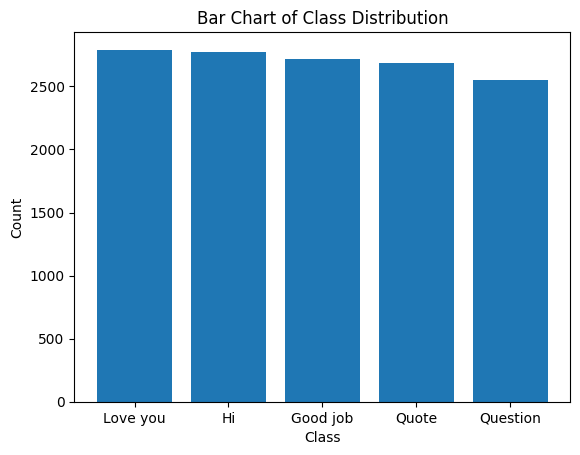

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['class'].value_counts()

# bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart of Class Distribution')
plt.show()

## Machine Learning 

In [16]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [18]:
y_test

4527    Love you
5717    Question
5865    Question
330           Hi
6357    Question
          ...   
6009    Question
7648       Quote
3092    Good job
2020          Hi
12            Hi
Name: class, Length: 4054, dtype: object

In [33]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [20]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [21]:
print(y_train.value_counts())

class
Hi          1971
Love you    1943
Good job    1896
Quote       1861
Question    1788
Name: count, dtype: int64


In [22]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [23]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [24]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [25]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9977799703996053
rc 0.9930932412432166
rf 0.9967932905772077
gb 0.9940799210656142


In [26]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred=clf.predict(X_test)
acc=classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

    Good job       1.00      1.00      1.00       822
          Hi       1.00      1.00      1.00       800
    Love you       1.00      1.00      1.00       848
    Question       0.99      1.00      1.00       762
       Quote       1.00      1.00      1.00       822

    accuracy                           1.00      4054
   macro avg       1.00      1.00      1.00      4054
weighted avg       1.00      1.00      1.00      4054



In [28]:
with open('HandA.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# Test Model

In [29]:
coords = (10, 100) 
import pickle 

In [30]:
with open('HandA.pkl', 'rb') as f:
    model = pickle.load(f)

In [31]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [36]:
import cv2
import mediapipe as mp 

mp_drawing = mp.solutions.drawing_utils # functions for drawing landmarks and connections on images
mp_holistic = mp.solutions.holistic # Mediapipe module provides a holistic solution for hand tracking

In [37]:
cap = cv2.VideoCapture(0)
#holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        
        # Recolor image back to BGR 
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
       
        #  Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    
        # Export coordinates
        try:
            # Extract Pose landmarks
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            

            row = right_row
            
            
            # Make Detections
            X = pd.DataFrame([row])
            hand_class = model.predict(X)[0]
            hand_prob = model.predict_proba(X)[0]
            print(hand_class, hand_prob)
            
 
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(hand_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, hand_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, hand_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(hand_prob[np.argmax(hand_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.15 0.17 0.21 0.28 0.19]
Hi [0.02 0.66 0.03 0.03 0.26]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.02 0.61 0.   0.02 0.35]
Hi [0.12 0.53 0.07 0.16 0.12]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.01 0.64 0.08 0.07 0.2 ]
Hi [0.06 0.47 0.   0.01 0.46]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.03 0.61 0.02 0.05 0.29]
Hi [0.05 0.53 0.03 0.08 0.31]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.05 0.49 0.03 0.02 0.41]
Hi [0.05 0.44 0.02 0.06 0.43]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.04 0.54 0.09 0.08 0.25]
Hi [0.02 0.59 0.1  0.09 0.2 ]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Hi [0.03 0.59 0.09 0.08 0.21]
Quote [0.1  0.32 0.07 0.13 0.38]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.1  0.09 0.15 0.54 0.12]
Question [0.17 0.14 0.18 0.44 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Good job [0.29 0.08 0.29 0.28 0.06]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.36 0.02 0.38 0.13 0.11]
Question [0.18 0.09 0.25 0.4  0.08]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.01 0.1  0.71 0.14 0.04]
Love you [0.02 0.16 0.62 0.07 0.13]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.   0.13 0.68 0.04 0.15]
Love you [0.   0.12 0.69 0.03 0.16]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.01 0.12 0.71 0.03 0.13]
Love you [0.01 0.12 0.71 0.03 0.13]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.02 0.11 0.75 0.03 0.09]
Love you [0.04 0.1  0.78 0.03 0.05]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.04 0.08 0.78 0.04 0.06]
Love you [0.07 0.09 0.74 0.04 0.06]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Love you [0.11 0.13 0.62 0.13 0.01]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Good job [0.34 0.21 0.1  0.3  0.05]
Good job [0.34 0.17 0.16 0.29 0.04]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.32 0.14 0.02 0.43 0.09]
Question [0.29 0.13 0.03 0.45 0.1 ]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.22 0.2  0.04 0.45 0.09]
Question [0.2  0.18 0.04 0.5  0.08]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.18 0.19 0.03 0.52 0.08]
Question [0.16 0.22 0.02 0.52 0.08]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but St

Question [0.19 0.21 0.03 0.49 0.08]
Question [0.18 0.16 0.02 0.57 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.17 0.17 0.03 0.54 0.09]
Question [0.18 0.16 0.03 0.54 0.09]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.16 0.2  0.02 0.53 0.09]
Question [0.14 0.21 0.02 0.56 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.17 0.18 0.05 0.53 0.07]
Question [0.16 0.19 0.05 0.53 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.15 0.17 0.04 0.57 0.07]
Question [0.14 0.18 0.04 0.57 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.13 0.17 0.02 0.62 0.06]
Question [0.13 0.15 0.02 0.64 0.06]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.12 0.16 0.03 0.63 0.06]
Question [0.16 0.16 0.04 0.57 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but St

Question [0.1  0.16 0.03 0.64 0.07]
Question [0.11 0.17 0.04 0.61 0.07]


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Question [0.17 0.16 0.04 0.57 0.06]
Question [0.19 0.17 0.05 0.49 0.1 ]


KeyboardInterrupt: 

# Image

In [38]:
import pickle


model_path = 'HandA.pkl'

# Open the file in binary mode and load the model
with open(model_path, 'rb') as file:
    model = pickle.load(file)


In [39]:
import cv2
import mediapipe as mp

def draw_landmarks(image, landmarks):
    for landmark in landmarks.landmark:
        h, w, _ = image.shape
        x, y = int(landmark.x * w), int(landmark.y * h)
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Load image
image_path = 'qoutation.jpeg'
image = cv2.imread(image_path)
h, w, _ = image.shape

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Convert BGR image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect hand landmarks
results = hands.process(rgb_image)

# Draw landmarks on the image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        draw_landmarks(image, hand_landmarks)

cv2.imshow('Hand Landmarks', image)
if cv2.waitKey(1) == ord('q'):
    cv2.destroyAllWindows()
    exit()  
# Release resources
hands.close()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

def draw_landmarks(image, landmarks):
    for landmark in landmarks.landmark:
        h, w, _ = image.shape
        x, y = int(landmark.x * w), int(landmark.y * h)
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Load image
image_path = 'qoutation.jpeg'
image = cv2.imread(image_path)
h, w, _ = image.shape

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Convert BGR image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect hand landmarks
results = hands.process(rgb_image)

# Draw landmarks on the image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        draw_landmarks(image, hand_landmarks)

    # Extract hand landmarks for prediction
    right = results.multi_hand_landmarks[0].landmark
    right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())

    # Make Detections
    X = pd.DataFrame([right_row])
    hand_class = model.predict(X)[0]
    hand_prob = model.predict_proba(X)[0]
    print(hand_class, hand_prob)

    # Display predictions on the image
    coords = (10, 60)
    cv2.rectangle(image, (coords[0], coords[1] + 5), (coords[0] + len(hand_class) * 20, coords[1] - 30), (245, 117, 16),
                  -1)
    cv2.putText(image, hand_class, coords, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image with landmarks and predictions
cv2.imshow('Hand Landmarks and Predictions', image)
if cv2.waitKey(0) == ord('q'):
    cv2.destroyAllWindows()
    exit()

# Release resources
hands.close()


C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asalk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Quote [0.   0.05 0.04 0.07 0.84]
